In [578]:
# library to handle requests
import requests
# library for data analsysis
import pandas as pd
# library
import wikipedia as wp
import numpy as np
import folium
from pandas.io.json import json_normalize
import json
from IPython.display import display
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
# import plotting
from matplotlib import pyplot as plt
# import GEO data API
from geopy.geocoders import Nominatim


In [579]:
html = wp.page("List_of_cities_and_towns_in_Colorado").html().encode("UTF-8")
co_municipality = pd.read_html(html)[0]
co_municipality.to_csv('wiki_colorado_2.csv',header=0,index=False)
co_municipality.head()

,Place Name,Municipality,Incorporation Date,Government,County,Map,Pop Rank,2014 Estimate,2010 Census,Change,Pop Density,Land Area,Water Area,Total Area,INCITS,WGS84
0,Aguilar,Town of Aguilar,"January 10, 1894",statutory town,Las Animas County,map,197,495,538,â7.99%,â2 487 kmâ2,â2 1.0161 kmâ2,NaN,â2 1.0161 kmâ2,800760,37Â°24â²13â³N 104Â°39â²18â³W﻿ / ﻿37.403626...
1,Akron,Town of Akron,"September 22, 1887",statutory town,Washington County[8],map,121,1694,1702,â0.47%,â2 251 kmâ2,â2 6.7973 kmâ2,NaN,â2 6.7973 kmâ2,800925,40Â°09â²52â³N 103Â°13â²14â³W﻿ / ﻿40.164382...
2,Alamosa,City of Alamosa,"August 12, 1878",home rule municipality,Alamosa County[8],map,48,9531,8780,+8.55%,â2 501 kmâ2,â2 19.0788 kmâ2,â2 0.3222 kmâ2,â2 19.4010 kmâ2,801090,37Â°28â²30â³N 105Â°52â²31â³W﻿ / ﻿37.475041...
3,Alma,Town of Alma,"December 2, 1873",statutory town,Park County,map,221,275,270,+1.85%,â2 286 kmâ2,â2 0.9325 kmâ2,â2 0.0049 kmâ2,â2 0.9374 kmâ2,801530,39Â°17â²09â³N 106Â°03â²59â³W﻿ / ﻿39.285942...
4,Antonito,Town of Antonito,"December 29, 1889",statutory town,Conejos County,map,163,775,781,â0.77%,â2 744 kmâ2,â2 1.0446 kmâ2,NaN,â2 1.0446 kmâ2,802355,37Â°04â²36â³N 106Â°00â²37â³W﻿ / ﻿37.076605...


In [580]:
def format_lat_lon(wgs84_str):
    lat_lon = wgs84_str.split(" / ")[1]
    
    lat_str = lat_lon.split(" ")[0]
    lat = float(lat_str[1:-3]) if lat_str[-1] is 'N' else float(lat_str[1:-3])*-1
    
    lon_str = lat_lon.split(" ")[1]
    lon = float(lon_str[:-3]) if lon_str[-1] is 'E' else float(lon_str[:-3])*-1
    
    return [lat,lon]

In [581]:
co_municipality['Latitude'] = co_municipality['WGS84'].apply(lambda x : format_lat_lon(x)[0])
co_municipality['Longitude'] = co_municipality['WGS84'].apply(lambda x : format_lat_lon(x)[1])
co_municipality.head()

,Place Name,Municipality,Incorporation Date,Government,County,Map,Pop Rank,2014 Estimate,2010 Census,Change,Pop Density,Land Area,Water Area,Total Area,INCITS,WGS84,Latitude,Longitude
0,Aguilar,Town of Aguilar,"January 10, 1894",statutory town,Las Animas County,map,197,495,538,â7.99%,â2 487 kmâ2,â2 1.0161 kmâ2,NaN,â2 1.0161 kmâ2,800760,37Â°24â²13â³N 104Â°39â²18â³W﻿ / ﻿37.403626...,37.403626,-104.655036
1,Akron,Town of Akron,"September 22, 1887",statutory town,Washington County[8],map,121,1694,1702,â0.47%,â2 251 kmâ2,â2 6.7973 kmâ2,NaN,â2 6.7973 kmâ2,800925,40Â°09â²52â³N 103Â°13â²14â³W﻿ / ﻿40.164382...,40.164382,-103.220685
2,Alamosa,City of Alamosa,"August 12, 1878",home rule municipality,Alamosa County[8],map,48,9531,8780,+8.55%,â2 501 kmâ2,â2 19.0788 kmâ2,â2 0.3222 kmâ2,â2 19.4010 kmâ2,801090,37Â°28â²30â³N 105Â°52â²31â³W﻿ / ﻿37.475041...,37.475041,-105.875314
3,Alma,Town of Alma,"December 2, 1873",statutory town,Park County,map,221,275,270,+1.85%,â2 286 kmâ2,â2 0.9325 kmâ2,â2 0.0049 kmâ2,â2 0.9374 kmâ2,801530,39Â°17â²09â³N 106Â°03â²59â³W﻿ / ﻿39.285942...,39.285942,-106.066319
4,Antonito,Town of Antonito,"December 29, 1889",statutory town,Conejos County,map,163,775,781,â0.77%,â2 744 kmâ2,â2 1.0446 kmâ2,NaN,â2 1.0446 kmâ2,802355,37Â°04â²36â³N 106Â°00â²37â³W﻿ / ﻿37.076605...,37.076605,-106.010222


In [582]:
co_municipality.shape

(271, 18)

In [583]:
def createMapView(co_municipality):
    address = 'Denver, CO'

    geolocator = Nominatim(user_agent="denver_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of Denver is {}, {}.'.format(latitude, longitude))

    # create map of resulting co_municipality
    map_co = folium.Map(location=[latitude, longitude], zoom_start=10)

    for lat, lng, place_name in zip(co_municipality['Latitude'], co_municipality['Longitude'], co_municipality['Place Name']):
        label = '{}'.format(place_name)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='blue',
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.7,
                parse_html=False).add_to(map_co)


    return map_co

In [584]:
createMapView(co_municipality)

The geograpical coordinate of Denver is 39.7392364, -104.9848623.


In [585]:
df_boulder = co_municipality[co_municipality['Municipality'] == 'City of Boulder']
df_castle = co_municipality[co_municipality['Municipality'] == 'Town of Castle Rock']
df_lone = co_municipality[co_municipality['Municipality'] == 'City of Lone Tree']

# top left corner of bounding box
ndx_of_intrest_boulder = co_municipality['Place Name'] == 'Boulder'
boulder_lat = co_municipality['Latitude'][ndx_of_intrest_boulder].values[0]
boulder_lon = co_municipality['Longitude'][ndx_of_intrest_boulder].values[0]

# bottom right corner of bounding box
ndx_of_intrest_parker = co_municipality['Place Name'] == 'Parker'
parker_lat = co_municipality['Latitude'][ndx_of_intrest_parker].values[0]
parker_lon = co_municipality['Longitude'][ndx_of_intrest_parker].values[0]


idx_lat = np.logical_and(co_municipality['Latitude'] <= boulder_lat, co_municipality['Latitude'] >= parker_lat)
idx_lon = np.logical_and(co_municipality['Longitude'] >= boulder_lon, co_municipality['Longitude'] <= parker_lon)
areas_of_interest_cleaned = co_municipality[np.logical_and(idx_lat, idx_lon)].reset_index(drop=True)

createMapView(areas_of_interest_cleaned)

The geograpical coordinate of Denver is 39.7392364, -104.9848623.


In [586]:
areas_of_interest.head(32)
areas_of_interest_cleaned = areas_of_interest.drop(['Pop Rank', '2014 Estimate', '2010 Census','Change','Pop Density','Land Area',\
                        'Water Area','Total Area', 'INCITS', 'WGS84'], axis=1)
areas_of_interest_cleaned_more = areas_of_interest_cleaned.drop(['Municipality','Incorporation Date', 'Government', 'County', 'Map'], axis=1)
areas_of_interest_cleaned_more.head(32)

,Place Name,Latitude,Longitude
0,Arvada,39.833728,-105.150306
1,Boulder,40.027435,-105.251945
2,Bow Mar,39.626594,-105.050914
3,Brighton,39.964790,-104.796581
4,Broomfield,39.953302,-105.052038
5,Centennial,39.590568,-104.869118
6,Cherry Hills Village,39.637418,-104.947470
7,Columbine Valley[19],39.599580,-105.030771
8,Commerce City,39.882968,-104.795452
9,Denver,39.761850,-104.881105


In [587]:
# Foursquare API Credentials
CLIENT_ID = '1RAZZUPP43HZQWU5GVPVQMW3SJMCAISY40PU1HKUADFKQE5Y' # your Foursquare ID
CLIENT_SECRET = 'XJHXGVLZNXIFJVEUMBJPN14P0EU0X3ZSKNSUKYUBTZY4YENR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1RAZZUPP43HZQWU5GVPVQMW3SJMCAISY40PU1HKUADFKQE5Y
CLIENT_SECRET:XJHXGVLZNXIFJVEUMBJPN14P0EU0X3ZSKNSUKYUBTZY4YENR


In [588]:
radius = 1000
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    return (nearby_venues)

In [589]:
# call getNearbyVenues on my areas of interest
denver_msa_venues = getNearbyVenues(names=areas_of_interest_cleaned_more['Place Name'],
                                   latitudes=areas_of_interest_cleaned_more['Latitude'],
                                   longitudes=areas_of_interest_cleaned_more['Longitude'])

Arvada
Boulder
Bow Mar
Brighton
Broomfield
Centennial
Cherry Hills Village
Columbine Valley[19]
Commerce City
Denver
Edgewater
Englewood
Federal Heights
Foxfield
Glendale
Golden
Greenwood Village
Lafayette
Lakeside[28]
Lakewood
Littleton
Lone Tree
Louisville
Morrison
Mountain View[30]
Northglenn
Parker
Sheridan
Superior
Thornton
Westminster
Wheat Ridge


In [590]:
# print shape of the venues df
print ("Shape of the Venues Dataframe: ", denver_msa_venues.shape)
denver_msa_venues.head()

Shape of the Venues Dataframe:  (1098, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,Arvada,39.833728,-105.150306,Youth Memorial Sports Complex,39.834961,-105.148977,Baseball Field
1,Arvada,39.833728,-105.150306,Apex Center,39.825841,-105.145750,Recreation Center
2,Arvada,39.833728,-105.150306,Apex Swimming Pool,39.825838,-105.145876,Gym Pool
3,Arvada,39.833728,-105.150306,Ralston Creek Trail West,39.825756,-105.152996,Trail
4,Arvada,39.833728,-105.150306,Apex Center Ice Arena,39.826422,-105.145112,Skating Rink


In [591]:
# Create a df out of all denver venues to concentrate only on Restaurants 

denver_msa_venues_only_restaurant = denver_msa_venues[denver_msa_venues['Venue_Category']\
                                                          .str.contains('Restaurant')].reset_index(drop=True)
denver_msa_venues_only_restaurant.index = np.arange(1, len(denver_msa_venues_only_restaurant)+1)
print ("Shape of the dataFrame with Venue Category as Restaurant: ", denver_msa_venues_only_restaurant.shape)
denver_msa_venues_only_restaurant.head()

Shape of the dataFrame with Venue Category as Restaurant:  (211, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
1,Boulder,40.027435,-105.251945,Fresh Thymes Eatery,40.026845,-105.253392,Gluten-free Restaurant
2,Boulder,40.027435,-105.251945,Curry n Kebob,40.030079,-105.257982,Indian Restaurant
3,Boulder,40.027435,-105.251945,Verde,40.030646,-105.258145,Mexican Restaurant
4,Boulder,40.027435,-105.251945,Chez Thuy,40.027033,-105.258433,Vietnamese Restaurant
5,Boulder,40.027435,-105.251945,Protein Bar & Kitchen,40.019200,-105.256631,Restaurant


In [592]:
# Show in Map the Top Rated Restaruants in the Top 5 Districts
address = 'Denver, CO'

geolocator = Nominatim(user_agent="den_explorer")
den_location = geolocator.geocode(address)
den_latitude = location.latitude
den_longitude = location.longitude
print('The geograpical coordinate of Denver, CO are {}, {}.'.format(den_latitude, den_longitude))


map_restaurants = folium.Map(location=[den_latitude, den_longitude], zoom_start=10, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Districts = denver_msa_venues_only_restaurant['District'].values

x = np.arange(len(Districts))

rainbow = rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
# markers_colors = []
for lat, lon, cat, distric in zip(denver_msa_venues_only_restaurant['Venue_Lat'], 
                                  denver_msa_venues_only_restaurant['Venue_Long'], 
                                  denver_msa_venues_only_restaurant['Venue_Category'], 
                                  denver_msa_venues_only_restaurant['District']):
    label = folium.Popup(str(cat) + ' ' + str(distric), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_restaurants)
       
map_restaurants

The geograpical coordinate of Denver, CO are 39.7392364, -104.9848623.


In [593]:
### Number of Unique Categories in the Dataframe 
print('There are {} unique categories.'.format(len(denver_msa_venues['Venue_Category'].unique())))
## We can check some of the categories randomly  
print (denver_msa_venues[['Venue_Category']][70:75])

There are 209 unique categories.
            Venue_Category
70         Organic Grocery
71             Pizza Place
72  Furniture / Home Store
73             Coffee Shop
74      Chinese Restaurant


In [594]:
## 215 unique categories in the Denver venues dataframe.
## Find the frequency of each category
print(denver_msa_venues['Venue_Category'].value_counts())
denver_trails = denver_msa_venues[denver_msa_venues['Venue_Category'] == 'Trail']
denver_trails.head(50)

Mexican Restaurant              50
Coffee Shop                     39
Pizza Place                     38
Park                            37
Fast Food Restaurant            35
Sandwich Place                  32
Convenience Store               28
Hotel                           28
American Restaurant             22
Gym / Fitness Center            22
Gym                             18
Chinese Restaurant              16
Grocery Store                   16
Pharmacy                        16
Marijuana Dispensary            15
Liquor Store                    15
Brewery                         15
Bank                            14
Furniture / Home Store          13
Video Store                     12
Italian Restaurant              12
Discount Store                  12
Pet Store                       11
Gas Station                     11
Restaurant                      11
Bakery                          11
Salon / Barbershop              11
Spa                             11
Breakfast Spot      

,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
3,Arvada,39.833728,-105.150306,Ralston Creek Trail West,39.825756,-105.152996,Trail
205,Commerce City,39.882968,-104.795452,Second Creek Trail,39.878206,-104.795366,Trail
498,Golden,39.742483,-105.210561,Triceratops Trail,39.742982,-105.220306,Trail
696,Lone Tree,39.530744,-104.871031,Bluffs Regional Park,39.528950,-104.881695,Trail
717,Louisville,39.969532,-105.143215,Coal Creek Trailhead,39.965309,-105.139832,Trail
918,Parker,39.504167,-104.773173,McCabe Meadows Trailhead,39.501254,-104.763106,Trail
963,Superior,39.931190,-105.159085,Coalton Trailhead,39.928901,-105.166664,Trail
975,Superior,39.931190,-105.159085,Meadowlark Trail,39.928750,-105.167504,Trail


### 10 Most Common Venues in the Denver, MSA.

In [595]:

# create a dataframe of top 10 categories
Denver_Venues_Top10 = denver_msa_venues['Venue_Category'].value_counts()[0:10].to_frame(name='Frequency')
Denver_Venues_Top10= Denver_Venues_Top10.reset_index()


Denver_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "Frequency": "Frequency"}, inplace=True)
Denver_Venues_Top10

,Venue_Category,Frequency
0,Mexican Restaurant,50
1,Coffee Shop,39
2,Pizza Place,38
3,Park,37
4,Fast Food Restaurant,35
5,Sandwich Place,32
6,Convenience Store,28
7,Hotel,28
8,American Restaurant,22
9,Gym / Fitness Center,22


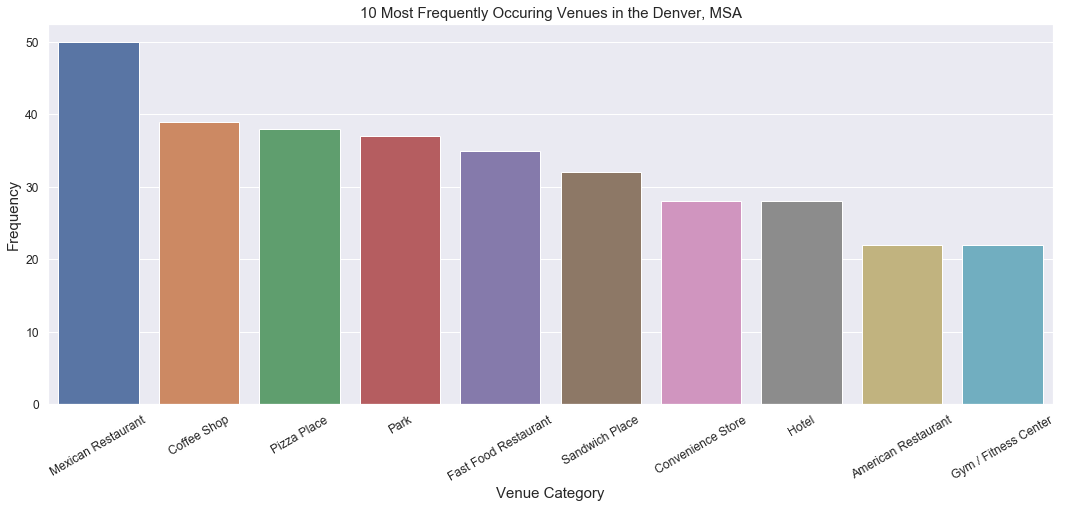

In [596]:
# plot the most common venues.

import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=Denver_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in the Denver, MSA', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

In [597]:
# Going to use one hot encoding (dummy variables)
# One hot encoding is a process by which categorical variables are converted into a form /
# that could be provided to ML algorithms to do a better job in prediction.
denver_msa_venues_onehot = pd.get_dummies(denver_msa_venues[['Venue_Category']], prefix="", prefix_sep="")
# add the district, column back in and make first column.
denver_msa_venues_onehot['District'] = denver_msa_venues['District']
fixed_columns = [denver_msa_venues_onehot.columns[-1]] + list(denver_msa_venues_onehot.columns[:-1])
denver_msa_venues_onehot = denver_msa_venues_onehot[fixed_columns]
# print
denver_msa_venues_onehot.shape

(1098, 210)

In [598]:
# Grab the mean of each venue within each district.
# Group the df by District.
denver_msa_venues_grouped = denver_msa_venues_onehot.groupby('District').mean().reset_index()
denver_msa_venues_grouped.shape

(31, 210)

In [599]:
num_top_venues = 10
for hood in denver_msa_venues_grouped['District']:
    print('-----'+hood+'-----')
    temp = denver_msa_venues_grouped[denver_msa_venues_grouped['District'] == hood].T.reset_index()
    temp.columns = ['Venue', 'Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    
    

-----Arvada-----
                  Venue  Frequency
0                  Park        0.2
1          Skating Rink        0.2
2        Baseball Field        0.2
3                 Trail        0.1
4  Gym / Fitness Center        0.1
5     Recreation Center        0.1
6              Gym Pool        0.1
7                 Motel        0.0
8      Motorsports Shop        0.0
9         Movie Theater        0.0


-----Boulder-----
                  Venue  Frequency
0           Pizza Place       0.06
1                   Gym       0.06
2        Sandwich Place       0.04
3               Brewery       0.04
4           Coffee Shop       0.04
5    Mexican Restaurant       0.04
6             Bookstore       0.03
7       Organic Grocery       0.03
8  Fast Food Restaurant       0.03
9              Pharmacy       0.03


-----Bow Mar-----
                    Venue  Frequency
0  Furniture / Home Store       0.25
1       Convenience Store       0.25
2            Tennis Court       0.25
3                   Beach

In [600]:
# function to sort venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [601]:
# create new datafram and display the top 10 venues for each district.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
district_venues_sorted = pd.DataFrame(columns = columns)
district_venues_sorted['District'] = denver_msa_venues_grouped['District']

for ind in np.arange(denver_msa_venues_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(denver_msa_venues_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head(32)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arvada,Skating Rink,Baseball Field,Park,Gym / Fitness Center,Trail,Recreation Center,Gym Pool,Farmers Market,Fast Food Restaurant,Field
1,Boulder,Gym,Pizza Place,Mexican Restaurant,Brewery,Coffee Shop,Sandwich Place,Convenience Store,Pharmacy,Fast Food Restaurant,Bookstore
2,Bow Mar,Furniture / Home Store,Convenience Store,Tennis Court,Beach,Fast Food Restaurant,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Court,Food
3,Brighton,Pool,Massage Studio,Park,Laundry Service,Theme Park,Zoo,Farmers Market,French Restaurant,Food Court,Food
4,Broomfield,Spa,Pool,Park,Soccer Field,Brewery,Lake,Zoo,Farmers Market,French Restaurant,Food Court
5,Centennial,Hotel,BBQ Joint,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Donut Shop,Sandwich Place,Restaurant,Rental Car Location,Sports Bar
6,Cherry Hills Village,Pizza Place,Theater,Farm,Fried Chicken Joint,French Restaurant,Food Court,Food,Flower Shop,Flea Market,Financial or Legal Service
7,Columbine Valley[19],Garden,Park,Golf Course,Brewery,Coffee Shop,Furniture / Home Store,American Restaurant,Discount Store,Frozen Yogurt Shop,Fried Chicken Joint
8,Commerce City,Pizza Place,Asian Restaurant,Deli / Bodega,Liquor Store,Music Venue,Mexican Restaurant,Trail,Chinese Restaurant,Spa,Convenience Store
9,Denver,Pool,Recreation Center,Park,Restaurant,Zoo,Electronics Store,Food Court,Food,Flower Shop,Flea Market


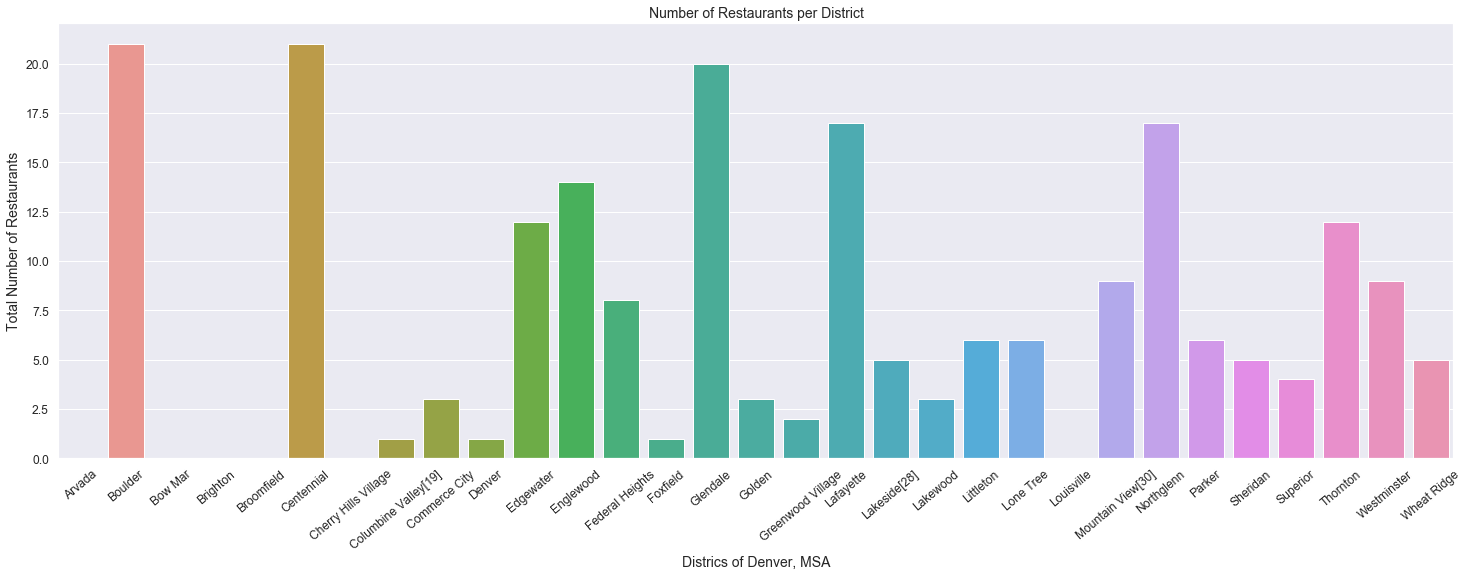

In [602]:
# Graph number of restaurants in each district
denver_msa_venues_only_restaurant = denver_msa_venues.groupby(['District'])['Venue_Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
denver_msa_venues_only_restaurant_df = denver_msa_venues_only_restaurant.to_frame().reset_index()
denver_msa_venues_only_restaurant_df.columns = ['District', 'Number of Restaurant']


list_rest_no = denver_msa_venues_only_restaurant_df['Number of Restaurant'].to_list()
#print (list_rest_no)
fig = plt.figure(figsize=(25,8))
bar = sns.barplot(x='District', y='Number of Restaurant', data=denver_msa_venues_only_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("Districs of Denver, MSA", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants per District", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

                District  Number of Trail
0                 Arvada                1
1                Boulder                0
2                Bow Mar                0
3               Brighton                0
4             Broomfield                0
5             Centennial                0
6   Cherry Hills Village                0
7   Columbine Valley[19]                0
8          Commerce City                1
9                 Denver                0
10             Edgewater                0
11             Englewood                0
12       Federal Heights                0
13              Foxfield                0
14              Glendale                0
15                Golden                1
16     Greenwood Village                0
17             Lafayette                0
18          Lakeside[28]                0
19              Lakewood                0
20             Littleton                0
21             Lone Tree                1
22            Louisville          

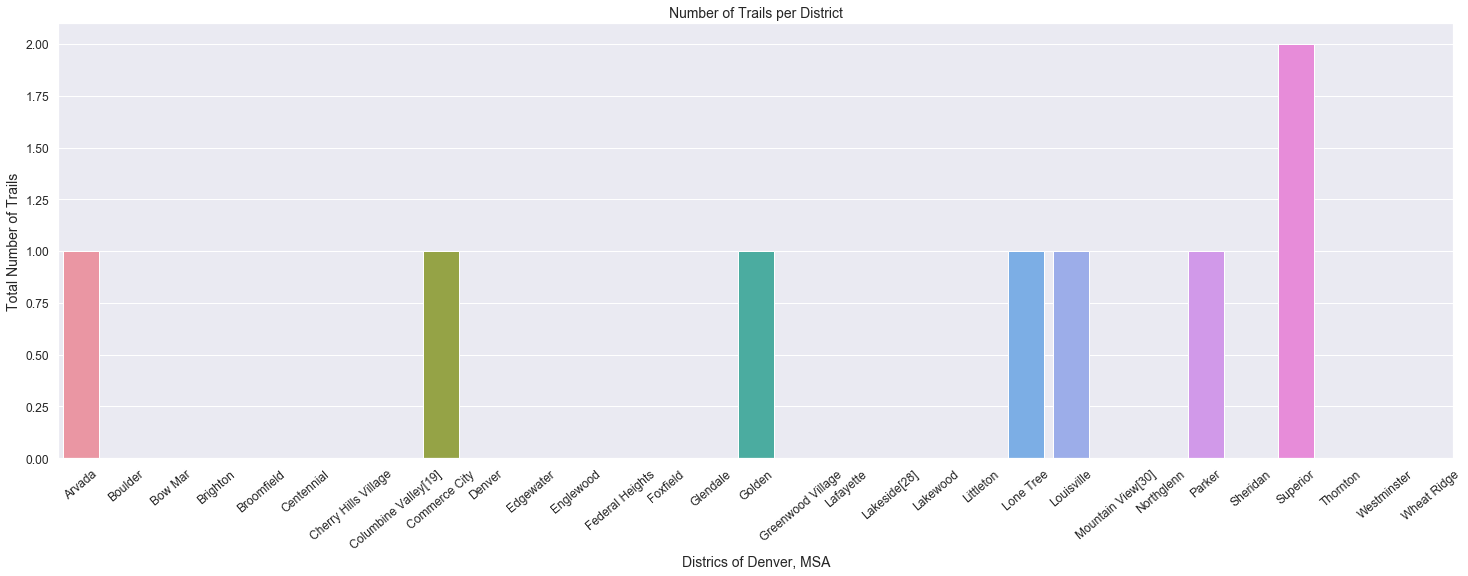

In [603]:
# Graph number of parks by district
denver_msa_venues_only_trail = denver_msa_venues.groupby(['District'])['Venue_Category'].apply(lambda x: x[x.str.contains('Trail')].count())
denver_msa_venues_only_trail_df = denver_msa_venues_only_trail.to_frame().reset_index()
denver_msa_venues_only_trail_df.columns = ['District', 'Number of Trail']

print(denver_msa_venues_only_trail_df)
list_trail_no = denver_msa_venues_only_trail_df['Number of Trail'].to_list()
fig = plt.figure(figsize=(25,8))
bar = sns.barplot(x='District', y='Number of Trail', data=denver_msa_venues_only_trail_df)

bar.set_ylabel("Total Number of Trails", fontsize=14)
bar.set_xlabel("Districs of Denver, MSA", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Trails per District", fontsize=14)
plt.savefig("No_of_Trails_as_Top_Venues.png", dpi=240)
plt.show()

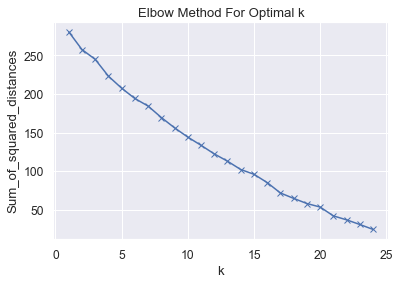

In [604]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

denver_grouped_clustering = denver_msa_venues_grouped.drop('District', 1)
mms = MinMaxScaler()
mms.fit(denver_grouped_clustering)
data_transformed = mms.transform(denver_grouped_clustering)

Sum_of_squared_distances = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Cluster the Districts

Run k-means to cluster the districts into 8 clusters.

In [605]:
# set number of clusters
kclusters = 20


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(denver_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([ 3,  1,  8, 12,  4,  1,  2, 10, 16,  5], dtype=int32)

In [606]:
# add clustering labels
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

denver_msa_venues_cluster_merged = areas_of_interest_cleaned_more

# merge 
denver_msa_venues_cluster_merged = denver_msa_venues_cluster_merged.join \
                                        (district_venues_sorted.set_index('District'), on='Place Name')
denver_msa_venues_cluster_merged = denver_msa_venues_cluster_merged.dropna()
denver_msa_venues_cluster_merged['Cluster Labels'] = denver_msa_venues_cluster_merged['Cluster Labels'].astype(int)
denver_msa_venues_cluster_merged['Cluster Labels'].head(32) 

0      3
1      1
2      8
3     12
4      4
5      1
6      2
7     10
8     16
9      5
10     1
11     1
12    11
13     6
14     1
15    17
16    15
17     1
18     9
19     0
20    13
21    19
22     7
24     9
25     1
26     1
27     1
28    14
29     1
30     1
31    18
Name: Cluster Labels, dtype: int64

In [607]:
# create map
map_clusters = folium.Map(location=[den_latitude, den_longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(denver_msa_venues_cluster_merged['Latitude'], 
                                  denver_msa_venues_cluster_merged['Longitude'], 
                                  denver_msa_venues_cluster_merged['Place Name'], 
                                  denver_msa_venues_cluster_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Explore the 8 Clusters

### Cluster 0

In [629]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] == 0, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Lakewood,Fast Food Restaurant,Shopping Mall,Coffee Shop,Lake,Grocery Store,Liquor Store,Electronics Store,Playground,Arcade,Business Service


In [633]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] == 1, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Boulder,Gym,Pizza Place,Mexican Restaurant,Brewery,Coffee Shop,Sandwich Place,Convenience Store,Pharmacy,Fast Food Restaurant,Bookstore
5,Centennial,Hotel,BBQ Joint,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Donut Shop,Sandwich Place,Restaurant,Rental Car Location,Sports Bar
10,Edgewater,Liquor Store,Fast Food Restaurant,Marijuana Dispensary,Pizza Place,Coffee Shop,Convenience Store,Burrito Place,Pub,Salon / Barbershop,Sandwich Place
11,Englewood,Mexican Restaurant,Gym / Fitness Center,Pet Store,Video Store,Pizza Place,Steakhouse,Convenience Store,Breakfast Spot,Brewery,American Restaurant
14,Glendale,Coffee Shop,Fast Food Restaurant,Hotel,Sandwich Place,Mexican Restaurant,Pharmacy,Gym / Fitness Center,Park,Pizza Place,Paper / Office Supplies Store
17,Lafayette,Mexican Restaurant,Coffee Shop,Convenience Store,Farmers Market,Sandwich Place,Breakfast Spot,Italian Restaurant,Fast Food Restaurant,Park,Brewery
25,Northglenn,Hotel,Mexican Restaurant,American Restaurant,Pizza Place,Mobile Phone Shop,Steakhouse,Coffee Shop,Gym / Fitness Center,Italian Restaurant,Sandwich Place
26,Parker,Sandwich Place,Women's Store,Sushi Restaurant,Mexican Restaurant,Steakhouse,Baseball Field,Farm,Clothing Store,Big Box Store,Mobile Phone Shop
27,Sheridan,Convenience Store,Coffee Shop,Waterfront,Pharmacy,Furniture / Home Store,Sports Bar,Sporting Goods Shop,Spa,Chinese Restaurant,Dessert Shop
29,Thornton,Fast Food Restaurant,Mexican Restaurant,Sandwich Place,Video Store,Pizza Place,Health & Beauty Service,Insurance Office,Italian Restaurant,Lake,Liquor Store


In [634]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] == 2, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Cherry Hills Village,Pizza Place,Theater,Farm,Fried Chicken Joint,French Restaurant,Food Court,Food,Flower Shop,Flea Market,Financial or Legal Service


In [635]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] == 3, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arvada,Skating Rink,Baseball Field,Park,Gym / Fitness Center,Trail,Recreation Center,Gym Pool,Farmers Market,Fast Food Restaurant,Field


In [636]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] == 4, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Broomfield,Spa,Pool,Park,Soccer Field,Brewery,Lake,Zoo,Farmers Market,French Restaurant,Food Court


In [637]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] == 5, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Denver,Pool,Recreation Center,Park,Restaurant,Zoo,Electronics Store,Food Court,Food,Flower Shop,Flea Market


In [638]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] == 6, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Foxfield,Construction & Landscaping,Mexican Restaurant,Intersection,Zoo,Farmers Market,Fried Chicken Joint,French Restaurant,Food Court,Food,Flower Shop


In [639]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] == 7, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Louisville,Home Service,Food,Health & Beauty Service,Flower Shop,Park,Auto Garage,Trail,Zoo,Farm,French Restaurant


In [640]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] == 7, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Louisville,Home Service,Food,Health & Beauty Service,Flower Shop,Park,Auto Garage,Trail,Zoo,Farm,French Restaurant


In [641]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] == 8, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bow Mar,Furniture / Home Store,Convenience Store,Tennis Court,Beach,Fast Food Restaurant,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Court,Food


In [642]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] == 9, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Lakeside[28],Theme Park,Discount Store,Marijuana Dispensary,Park,Convenience Store,Automotive Shop,Mexican Restaurant,Pharmacy,Gym / Fitness Center,Gas Station
24,Mountain View[30],Theme Park,Marijuana Dispensary,Coffee Shop,Convenience Store,Park,Discount Store,Mexican Restaurant,Sandwich Place,Italian Restaurant,Gas Station


In [643]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] == 10, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Columbine Valley[19],Garden,Park,Golf Course,Brewery,Coffee Shop,Furniture / Home Store,American Restaurant,Discount Store,Frozen Yogurt Shop,Fried Chicken Joint


In [644]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] ==11, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Federal Heights,Pizza Place,Mexican Restaurant,Bar,Liquor Store,Marijuana Dispensary,Fast Food Restaurant,Discount Store,Convenience Store,Chinese Restaurant,Gas Station


In [645]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] == 12, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Brighton,Pool,Massage Studio,Park,Laundry Service,Theme Park,Zoo,Farmers Market,French Restaurant,Food Court,Food


In [646]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] == 13, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Littleton,Clothing Store,Women's Store,Furniture / Home Store,Park,Kids Store,Gift Shop,Cosmetics Shop,Bakery,Ice Cream Shop,Brewery


In [647]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] == 14, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Superior,Park,Trail,Ice Cream Shop,Thai Restaurant,Italian Restaurant,Grocery Store,Liquor Store,Food,Field,Construction & Landscaping


In [648]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] == 15, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Greenwood Village,Gym / Fitness Center,Park,Wine Bar,Greek Restaurant,Spa,Café,Movie Theater,Coffee Shop,Comedy Club,Pub


In [649]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] == 16, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Commerce City,Pizza Place,Asian Restaurant,Deli / Bodega,Liquor Store,Music Venue,Mexican Restaurant,Trail,Chinese Restaurant,Spa,Convenience Store


In [650]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] == 17, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Golden,Sandwich Place,Music Store,Asian Restaurant,Restaurant,Golf Course,Shipping Store,Furniture / Home Store,Thrift / Vintage Store,Discount Store,Trail


In [651]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] == 18, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Wheat Ridge,Bar,Gym,Pool,Gas Station,Convenience Store,Sandwich Place,Chinese Restaurant,Garden Center,Donut Shop,Liquor Store


In [652]:
denver_msa_venues_cluster_merged.loc[denver_msa_venues_cluster_merged['Cluster Labels'] == 19, denver_msa_venues_cluster_merged.columns[[0] + list(range(4, denver_msa_venues_cluster_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Lone Tree,Coffee Shop,Sporting Goods Shop,Theater,Dessert Shop,Diner,Fast Food Restaurant,Salad Place,Bus Stop,Mexican Restaurant,Burger Joint
